# Solving the Secular Equation

The first-order optimality conditions include a single Lagrange multiplier $\mu$:

\begin{align}
2w^\top D + 2(V^\top R Q_{obj}z^*) &= 2\mu w^\top Q_\theta \\
\iff w^\top D + d &= \mu w^\top Q_\theta~,
\end{align}
where $d = V^\top R Q_{obj}z^*$. We would like to solve the above equation subject to $w^\top Q_\theta w = \bar{c}$, where $\bar{c} = c -  z^{*\top}Q_\theta z^*$. We will solve this system via enumeration, beginning with $\mu=0$ and checking $\mu=D_i$ for each diagonal element of $D$. Once these possibilities are exhausted, we write the ``secular equation'' , setting it equal to $\bar{c}^2$:

\begin{align}
s(\mu) = \sum_{i:Q{_\theta,i}\neq 0} \left(\frac{d_i}{\mu - D_i}\right)^2 &= \bar{c}^2
\end{align}
This equation has a number of solutions, each corresponding to some value of $w$, which must be checked for feasibility.

In [83]:
# Check 0 and diagonals of D before moving on to
# binary search:

mu_vals,w_vals,check = tr_check_diag(D,d,Qtheta,c)
# If all values of "check" are false, continue:
if all(!check)
    # continue
else
    display(mu_vals[find(check)])
end

In [133]:
function tr_solve_secular(D,d,Qtheta,c)
    """ Solve the secular equation via binary search.
    """
    eps = 1e-8
    solutions = Float64[]
    poles = sort(diag(D*Qtheta))
    # Each diagonal element is a pole.
    for i in 1:length(poles)
        
        # Head left first:
        high = poles[i]
        if i == 1
            low = high - abs(poles[i] - poles[i+1])
        else
            low = high - abs(poles[i] - poles[i-1])/2
        end
        
        # Initialize mu:
        mu = (high + low)/2
        w = find_w(mu,D,d,Qtheta)
        diff = (w'*w)[1] - c^2
        diff_old = 0
        stall = false
        while abs(diff) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = mu
            else
                low = mu
            end
            mu = (high + low)/2
            w = find_w(mu,D,d,Qtheta)
            diff_old = diff
            diff = (w'*w)[1] - c^2
        end
        if !stall
            push!(solutions,mu)
        end
        
        # Now head right:
        high = poles[i]
        if i == length(poles)
            low = high + abs(poles[i] - poles[i-1])
        else
            low = high + abs(poles[i] - poles[i+1])/2
        end
        
        mu = (high + low)/2
        w = find_w(mu,D,d,Qtheta)
        diff = (w'*w)[1] - c^2
        diff_old = 0
        stall = false
        while abs((w'*w)[1] - c^2) > eps
            if diff == diff_old
                stall = true
                break
            end
            if diff > 0
                high = mu
            else
                low = mu
            end
            mu = (high + low)/2
            w = find_w(mu,D,d,Qtheta)
            diff_old = diff
            diff = (w'*w)[1] - c^2
        end
        if !stall
            push!(solutions,mu)
        end
    end
    return solutions
end

tr_solve_secular (generic function with 1 method)

In [101]:
using Interact
using PyPlot

Slider{Float64}([Input{Float64}] 7.5,"c",7.5,5.0:0.1:10.0)

/usr/local/lib/python2.7/dist-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


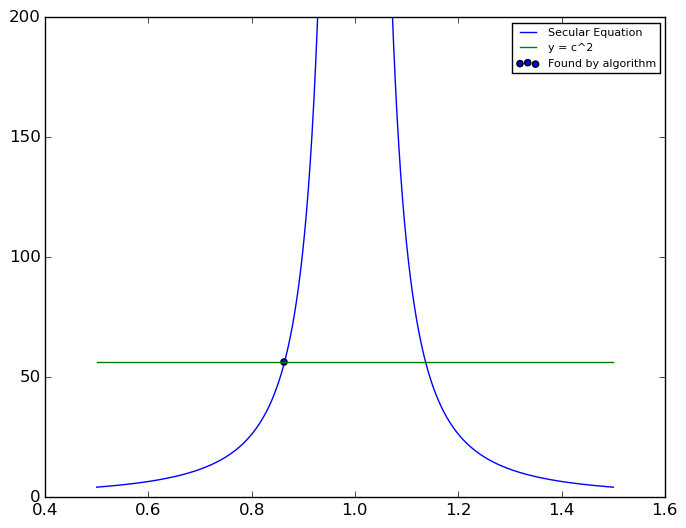

In [140]:
D = diagm([1,1,1.,1,1])
poles = diag(D)
d = [0.2,0.2,1.,0.1,0.2]
Qtheta = diagm([0,0,1.,1,1])

f = figure()
@manipulate for c = 5:0.1:10; withfig(f) do
    solutions = tr_solve_secular(D,d,Qtheta,c)
    # mu = solutions[1]
    # display(length(solutions))
    # w = find_w(mu,D,d,Qtheta)
    # (w'*w)[1]

    mu_vals = linspace(0.5*minimum(poles),1.5*maximum(poles),10000)
    s_vals = [(find_w(i,D,d,Qtheta)'*find_w(i,D,d,Qtheta))[1] for i in mu_vals]
    plot(mu_vals,s_vals)
    hold = true
    plot([mu_vals[1],mu_vals[end]],[c^2,c^2])
    ylim([0,200]) #ylim([0,2*c^2])
    scatter(solutions,c^2*ones(length(solutions)))
        legend(["Secular Equation","y = c^2","Found by algorithm"],fontsize=8)
    end
end

In [100]:
w = [-1,-0,8,-0.4444]

w'*w[1]

1x4 Array{Float64,2}:
 1.0  -0.0  -8.0  0.4444